# 🚁📦 Delivery Company

You have been hired by an imaginary delivery company that plans to use drones to deliver packages to customers. As part of their planning process, they want to **divide the city into 3 geographical zones so that they can optimize their delivery routes** and maximize their efficiency.

You have decided to **use a custom KMeans clustering model** to achieve this.

![problem draw](./img/drones.png)


## Tasks:
1. **Develop a custom KMeans clustering model** to divide the city into 3 zones based on the geographic coordinates of the delivery locations.
2. Use the model to **classify new data points**, which represents the locations of new delivery addresses.
3. **Evaluate the performance** of your model.


Note: You can assume that the delivery company has already collected data on the geographical coordinates of past delivery locations, which you will use to train and test your model.


# 📚 Libraries

In [11]:
import pandas as pd
import sys
import os
import pathlib
import numpy as np
import random
import math
import matplotlib.pyplot as plt

# Add source directory to the path be able to import our custom libraries
sys.path.insert(1, os.path.join(sys.path[0], '../'))
from src.kmeans.kmeans_model import KMeans 
from src.maths import vectors
from src.maths.vectors import Vector

# 💹 Creation of a dataset to play with
We will create random coordinates for the houses we have to deliver to packages to. 
For each house we need 2 coordinates (x, y)

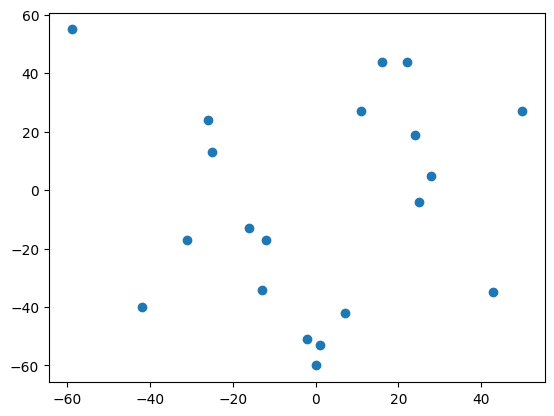

In [6]:
random.seed(12)

# Create points that will simulate the houses we have to deliver. Each house will be
# representend as the coordinates (x, y)
n_points = 20
points = []

# Generate coordinates
min = -60
max = 60
x = np.array([random.randrange(min, max) for x in range(n_points)])
y = np.array([random.randrange(min, max) for y in range(n_points)])

# Creation of the vector objects. A Vector object is a custom implementation to 
# calculate operations with linear algebra.
vectors = []
for i in range(len(x)):
    vectors.append(Vector([x[i], y[i]]))
    
# Visualize the points in our map
plt.scatter(x, y)

# 🤖 Create our KMeans model

In [7]:
# As we need to separate into 3 zones, the number of cluster must be of 3.
# The implementations allow saving intermediate steps for further analysis.
kmeans = KMeans(num_clusters=3, 
               save_intermediate_steps=True)

# 🦾Training

In [8]:
# Train the model with the data
kmeans.train(inputs=vectors)

iteration: 0 | Changes: 9 / 20: : 1it [00:00, 130.85it/s]


# 📈 Visualize each step

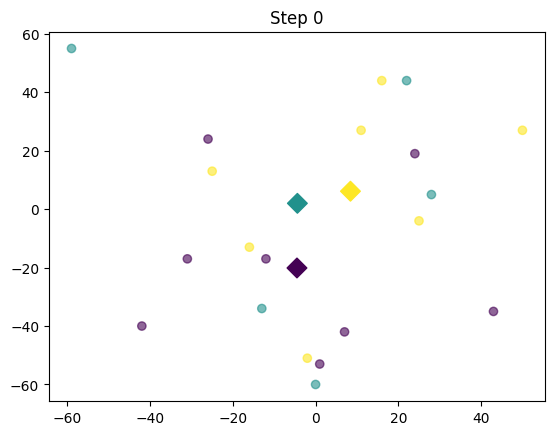

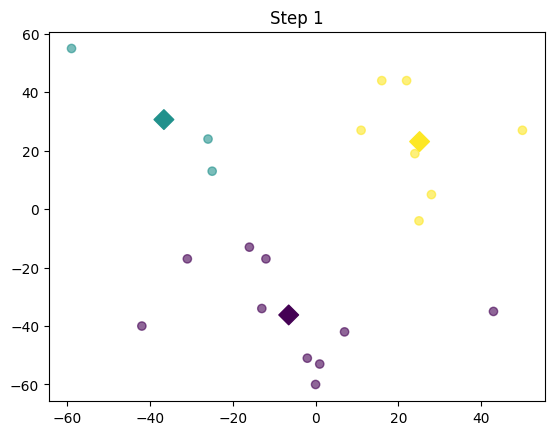

In [9]:
# As we have created the model when the "save_intermediate_steps" set to True then
# we can analyze how have they cluster changed in every step
for index_step, step in enumerate(kmeans.intermediate_steps):

    # What points have every cluster in a given step
    clusters = step['state']

    # Draw each input
    plt.scatter(x, y, c=clusters, alpha=0.6)

    # Draw Centroids
    x_centroid = np.array([centroid.get(0) for centroid in step['centroids']])
    y_centroid = np.array([centroid.get(1) for centroid in step['centroids']])
    plt.scatter(x_centroid, y_centroid,
                marker= 'D', 
                s=100, 
                c=[x for x in range(kmeans.num_clusters)])
    
    plt.title(f"Step {index_step}")


    plt.show()


# Visualize each step in a subplot

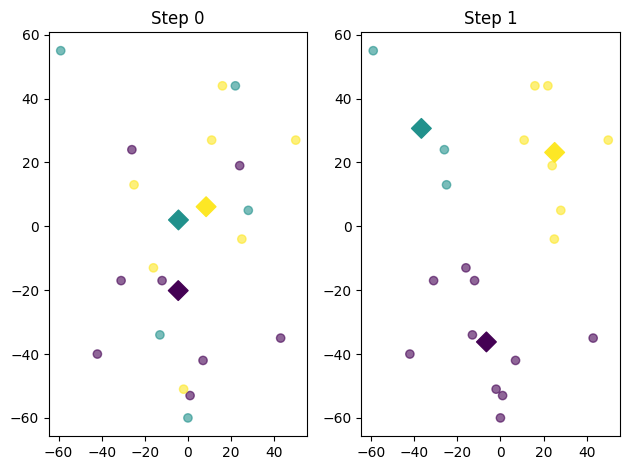

In [12]:
num_columns = 2


for index_step, step in enumerate(kmeans.intermediate_steps):

    clusters = step['state']

    plt.subplot(math.ceil(len(kmeans.intermediate_steps)/num_columns), num_columns, index_step + 1)
    # Draw each input
    plt.scatter(x, y, c=clusters, alpha=0.6)

    # Draw Centroids
    x_centroid = np.array([centroid.get(0) for centroid in step['centroids']])
    y_centroid = np.array([centroid.get(1) for centroid in step['centroids']])
    plt.scatter(x_centroid, y_centroid,
                marker= 'D', 
                s=100, 
                c=[x for x in range(kmeans.num_clusters)])
    
    plt.title(f"Step {index_step}")
    plt.tight_layout()
    
plt.show()


# ✅ How good is our model?

We can use "inertia" to measure how good our model is. It measures the sum of squared distances between each data point and its closest centroid.\
In the following example we can calculate the sum for the "yellow" cluster as the sum of the distance to every yellow point to its centroid.

![problem draw](./img/sum_distance_to_centroid.png)

In [14]:
# In our case the "inertia" is calculated in the last step of the "train" method.
print(f"Inertia: {kmeans.inertia}")

Inertia: 441.7459105701037
